In [36]:
import pandas as pd

# Loading the dataset
file_path = r'C:Desktop/DM Project/Reviews.csv'
df = pd.read_csv(file_path)

# Displaying basic information about the DataFrame
print(df.info())

# Displaying the first 1000 rows for initial exploration
print(df.head(1000))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
       Id   ProductId          UserId                      ProfileName  \
0       1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1       2  B00813GRG4  A1D87F6ZCVE5NK            

In [37]:
import pandas as pd

# Displaying data types of each column
data_types = df.dtypes
print("Data Types:")
print(data_types)


Data Types:
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


In [38]:
# Check for missing values
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [11]:
import pandas as pd


# Fill missing values with 0 in 'ProfileName' and 'Summary' columns
df['ProfileName'].fillna(0, inplace=True)
df['Summary'].fillna(0, inplace=True)

In [7]:
#Again checking 
print(df.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [9]:
# Checking for duplicate rows
duplicate_rows = df.duplicated()

# Displaying the duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())
print(df[duplicate_rows])

Number of duplicate rows: 0
Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


In [ ]:
from bs4 import BeautifulSoup
import re

def clean_text(text):
    # Removing HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()

    # Removing non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    return text

# Applying text cleaning to the 'Text' column
df['Text'] = df['Text'].apply(lambda x: clean_text(str(x)))


In [13]:
print(df['Text'].head(1000))

0      I have bought several of the Vitality canned d...
1      Product arrived labeled as Jumbo Salted Peanut...
2      This is a confection that has been around a fe...
3      If you are looking for the secret ingredient i...
4      Great taffy at a great price   There was a wid...
                             ...                        
995    BLACK MARKET HOT SAUCE IS WONDERFUL     My hus...
996    Man what can i say  this salsa is the bomb   i...
997    this sauce is so good with just about anything...
998    Not hot at all  Like the other low star review...
999    I have to admit  I was a sucker for the large ...
Name: Text, Length: 1000, dtype: object


In [14]:
# Displaying the total number of reviews
total_reviews = len(df)
print(f"Total number of reviews: {total_reviews}")

# Displaying the total number of words in the 'Text' column
total_words = df['Text'].apply(lambda x: len(x.split())).sum()
print(f"Total number of words: {total_words}")


Total number of reviews: 568454
Total number of words: 46457953


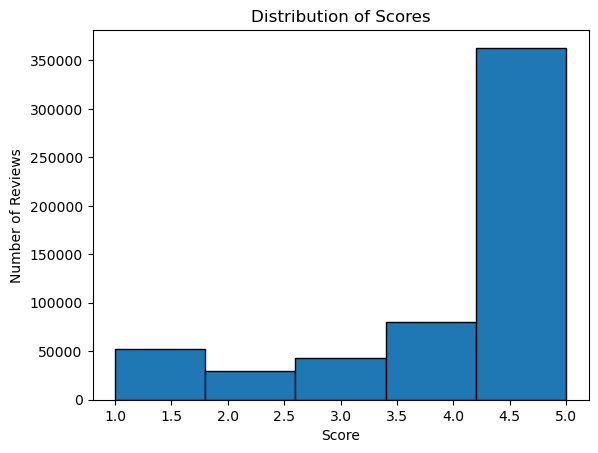

In [15]:
#This code uses matplotlib to create a histogram displaying the distribution of scores in the 
#DataFrame column 'Score'.
#The x-axis represents scores, and the y-axis shows the number of reviews for each score.

import matplotlib.pyplot as plt

plt.hist(df['Score'], bins=5, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Scores')
plt.show()


         Word  Count
988     chips    562
2929     like    415
2247     good    323
5057    taste    289
2294    great    286
2027   flavor    280
2756     just    251
2070     food    219
3014     love    218
3915  product    212


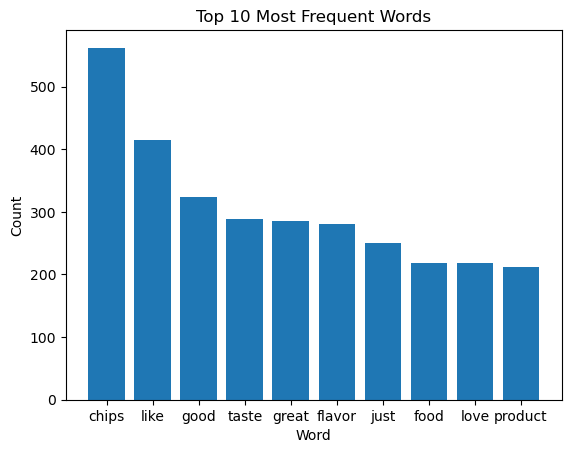

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

subset_df = df.head(1000)

# Create a CountVectorizer to convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the 'Text' column to get the word counts
word_counts = vectorizer.fit_transform(subset_df['Text'])

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Sum the counts of each word across all reviews
word_counts_sum = word_counts.sum(axis=0)

# Create a DataFrame with words and their counts
word_counts_df = pd.DataFrame({'Word': words, 'Count': word_counts_sum.tolist()[0]})

# Sort the DataFrame by counts in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Display the top N most frequent words (adjust N as needed)
top_n = 10
print(word_counts_df.head(top_n))

# Plot the top N words
plt.bar(word_counts_df['Word'][:top_n], word_counts_df['Count'][:top_n])
plt.xlabel('Word')
plt.ylabel('Count')
plt.title(f'Top {top_n} Most Frequent Words')
plt.show()


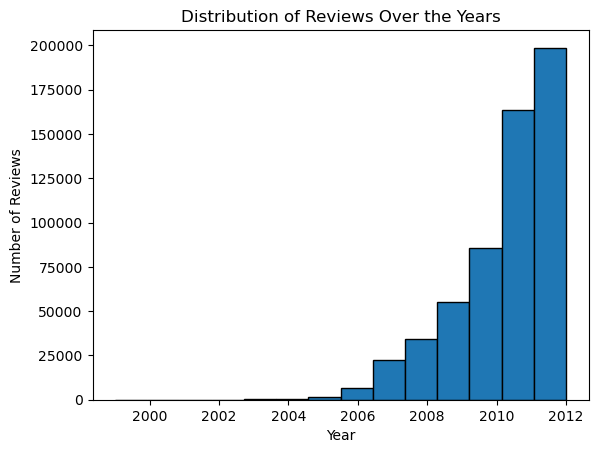

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Year'] = df['Time'].dt.year

# Plotting the distribution of reviews over the years
plt.hist(df['Year'], bins=df['Year'].nunique(), edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews Over the Years')
plt.show()

In [18]:
top_products = df['ProductId'].value_counts().head(1000)
print("Top Products by Number of Reviews:")
print(top_products)


Top Products by Number of Reviews:
ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B0006J32A0     86
B001D0KG4Q     86
B002AQP5IE     86
B006N08SPA     86
B0013QRY22     86
Name: count, Length: 1000, dtype: int64


In [19]:
import pandas as pd

top_products = df['ProductId'].value_counts()

# Display the top products and their counts
print("Top Products by Number of Reviews:")
print(top_products.head(10))  # Displaying the top 10 products for example


Top Products by Number of Reviews:
ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0026KNQSA    564
B007M83302    564
Name: count, dtype: int64


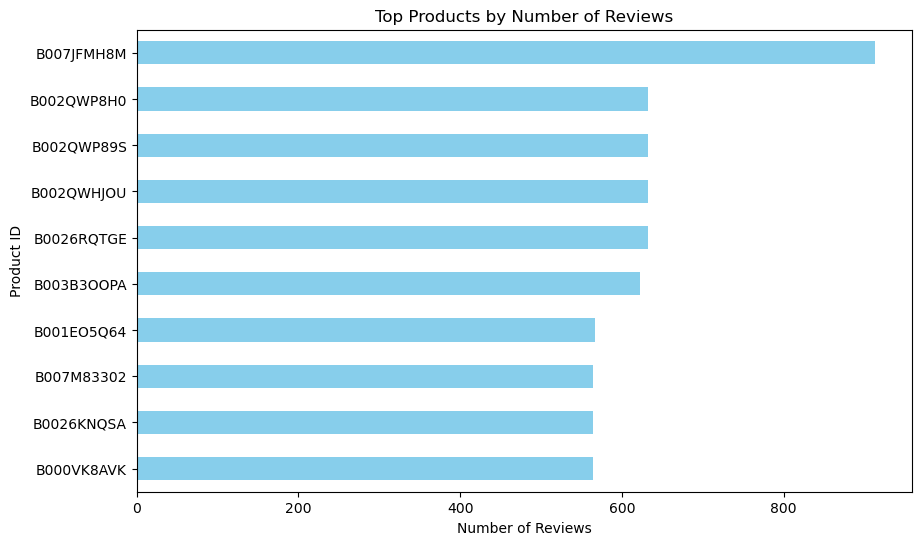

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting the top products based on the number of reviews
top_products = df['ProductId'].value_counts()

# Plotting the top N products using a horizontal bar plot
top_n = 10
plt.figure(figsize=(10, 6))
top_products.head(top_n).sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Number of Reviews')
plt.ylabel('Product ID')
plt.title('Top Products by Number of Reviews')
plt.show()



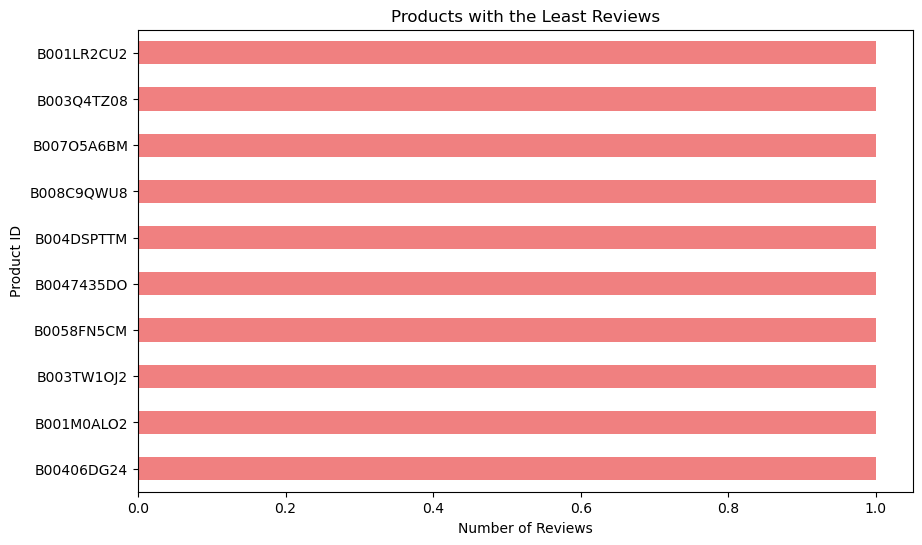

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:Desktop/DM Project/Reviews.csv'
df = pd.read_csv(file_path)

# Calculate the number of reviews for each product
product_reviews = df['ProductId'].value_counts()

# Identify the products with the fewest reviews 
bottom_n = 10
products_fewest_reviews = product_reviews.tail(bottom_n)

# Convert product identifiers to strings
products_fewest_reviews.index = products_fewest_reviews.index.astype(str)

# Plot the products with the fewest reviews using a horizontal bar plot
plt.figure(figsize=(10, 6))
products_fewest_reviews.sort_values().plot(kind='barh', color='lightcoral')
plt.xlabel('Number of Reviews')
plt.ylabel('Product ID')
plt.title('Products with the Least Reviews')
plt.show()


In [24]:
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


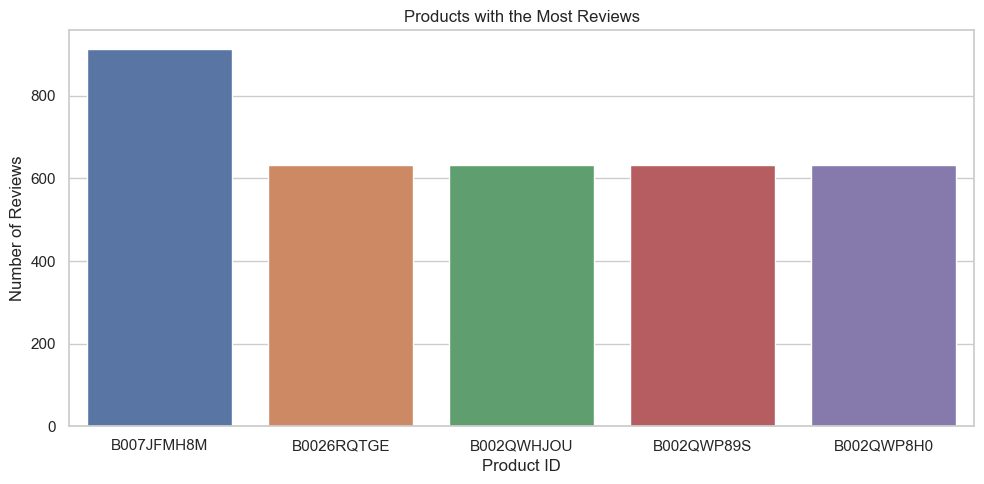

In [25]:
#This code utilizes seaborn and matplotlib to create a bar plot,
#displaying the products with the most reviews by counting the number of reviews for each product in the DataFrame df,
#with the x-axis representing product IDs and the y-axis representing the corresponding number of reviews.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count the number of reviews for each product
product_review_counts = df['ProductId'].value_counts()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Bar plot for products with the most reviews
top_reviews = product_review_counts.head()
sns.barplot(ax=axes, x=top_reviews.index, y=top_reviews.values)
axes.set_title('Products with the Most Reviews')
axes.set_xlabel('Product ID')
axes.set_ylabel('Number of Reviews')

# Display the plot
plt.tight_layout()
plt.show()


In [26]:
#Total number of reviews 
total_reviews = df.shape[0]
print("Total Number of Reviews:", total_reviews)


Total Number of Reviews: 568454


                UserId   Id
182011  A3OXHLG6DIBRW8  448
65586   A1YUL9PCJR3JTY  421
252275   AY12DBB0U420B  389
82919   A281NPSIMI1C2R  365
66162   A1Z54EM24Y40LL  256
55736   A1TMAVN4CEM8U8  204
110863  A2MUGFV2TDQ47K  201
191283  A3TVZM3ZIXG8YW  199
183161  A3PJZ8TU8FDQ1K  178
238453   AQQLWCMRNDFGI  176


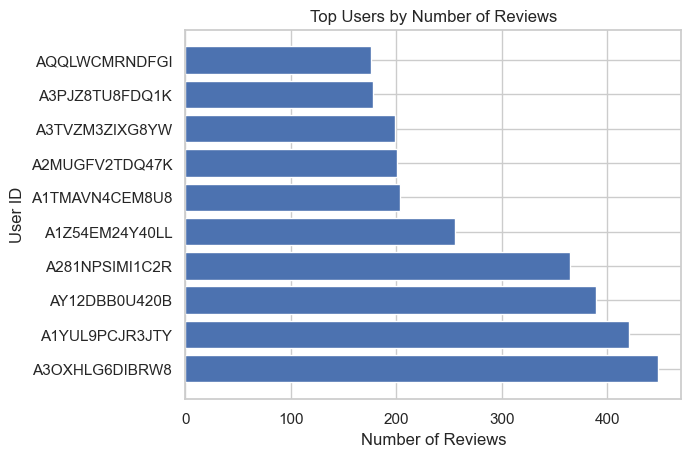

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by 'UserId' and count the number of reviews for each user
user_review_counts = df.groupby('UserId')['Id'].count().reset_index()

# Sorting the DataFrame by the number of reviews in descending order
user_review_counts = user_review_counts.sort_values(by='Id', ascending=False)

# Displaying the top users
top_users = user_review_counts.head(10)
print(top_users)

# Visualizing the distribution of user review counts with a horizontal bar plot
plt.barh(top_users['UserId'], top_users['Id'])
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')
plt.title('Top Users by Number of Reviews')
plt.show()

In [2]:
#Product Analysis: Which products have the most reviews? Which products have the highest and lowest average scores?


# Count the number of reviews for each product
product_review_counts = df['ProductId'].value_counts()

# Display the products with the most reviews
print("Products with the most reviews:")
print(product_review_counts.head())


# Calculate the average score for each product
product_average_scores = df.groupby('ProductId')['Score'].mean()

# Display the products with the highest average scores
print("Products with the highest average scores:")
print(product_average_scores.nlargest())

# Display the products with the lowest average scores
print("Products with the lowest average scores:")
print(product_average_scores.nsmallest())


Products with the most reviews:
ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
Name: count, dtype: int64
Products with the highest average scores:
ProductId
141278509X    5.0
2841233731    5.0
9376674501    5.0
B00002Z754    5.0
B0000535LF    5.0
Name: Score, dtype: float64
Products with the lowest average scores:
ProductId
B00006IDJO    1.0
B000084ET4    1.0
B00008DFOM    1.0
B00008GKAV    1.0
B0000A1OEJ    1.0
Name: Score, dtype: float64


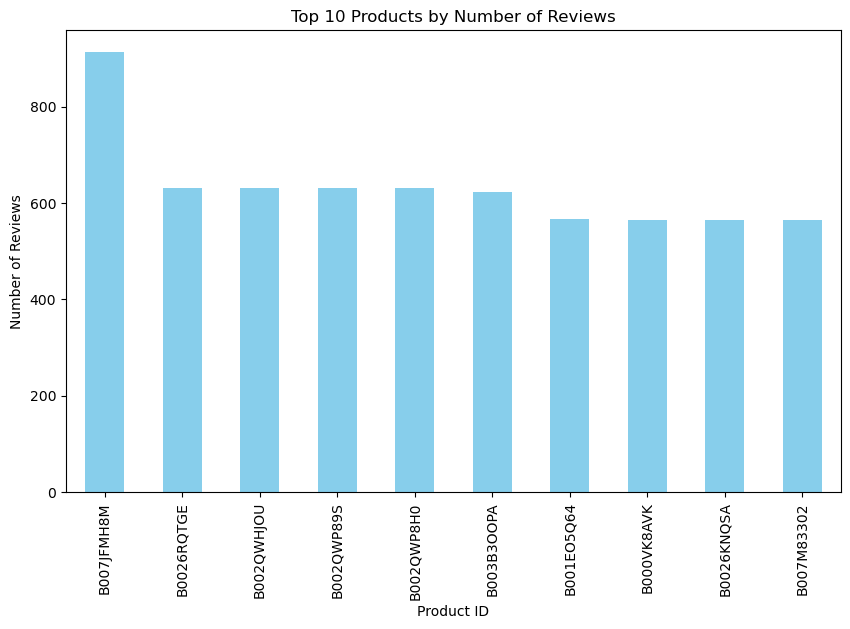

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:Desktop/DM Project/Reviews.csv'
df = pd.read_csv(file_path)

# Count the number of reviews for each product
product_review_counts = df['ProductId'].value_counts()

# Calculate the average score for each product
product_average_scores = df.groupby('ProductId')['Score'].mean()

# Plot the number of reviews for the top 10 products
plt.figure(figsize=(10, 6))
product_review_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Number of Reviews')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.show()

In [5]:
# Find the longest and shortest reviews from the first 1000 reviews, removing "br" tags
longest_review_text = df.loc[:999, 'Text'].apply(len).idxmax()
shortest_review_text = df.loc[:999, 'Text'].apply(len).idxmin()

# Extract the reviews and number of characters, removing "br" tags
longest_review_text = df.loc[longest_review_text, 'Text'].replace('<br />', '')
shortest_review_text = df.loc[shortest_review_text, 'Text'].replace('<br />', '')

# Display the results
print("Longest Review:")
print(longest_review_text)
print("Number of Characters:", len(longest_review_text))
print("\nShortest Review:")
print(shortest_review_text)
print("Number of Characters:", len(shortest_review_text))


Longest Review:
I was getting VERY worried, when I read some of the other reviews here.  Specifically, the "One Star" reviews, to which I always go, to see if the faults these other reviewers find with any merchandise would prevent me from buying it.WOW!  They sure seemed to hate the KETTLE CHIPS, BACKYARD BARBECUE 9-OUNCE BAGS, (PACK OF 12), that I had bought as 1 ounce bags, liked A LOT, decided to subscribe....and then, for good measure, got 2 orders of the 9 ounce bags.Yes...I love potato chips....especially these KETTLE CHIPS, BACKYARD BARBECUE FLAVOUR....but others seemed to really HATE them...or at least, hate how they had changed.But then I realized they were talking about OTHER FLAVOURS!  Amazon, in it's deep wisdom, has obviously seen fit to put ALL comments concerning ALL flavours of KETTLE, (and other brands of?????) potato chips, TOGETHER!Of course, this DOES have SOME advantages, because most potato-chip lovers, (like me!), enjoy eating several flavour, and brand varietie

In [6]:
# Find the longest and shortest reviews in the entire dataset, removing "br" tags
longest_review_index = df['Text'].apply(len).idxmax()
shortest_review_index = df['Text'].apply(len).idxmin()

# Extract the reviews and number of characters, removing "br" tags
longest_review_text = df.loc[longest_review_index, 'Text'].replace('<br />', '')
shortest_review_text = df.loc[shortest_review_index, 'Text'].replace('<br />', '')

# Display the results
print("Longest Review:")
print(longest_review_text)
print("Number of Characters:", len(longest_review_text))
print("\nShortest Review:")
print(shortest_review_text)
print("Number of Characters:", len(shortest_review_text))


Longest Review:
Fuzzy Wuzzy's Summary:*** Somewhat recommended, with reservations and only lukewarm fuzzies.Positives:+ Not too expensive compared to other bottled water, although it is not cheap either.Negatives:- This bottled water product's labeling, product descriptions, and health claims are misleading.At first glance, this 1.5-liter bottle of water that I am reviewing looks like another one of the many varieties of bottled water on the market.  There are many kinds of bottled water: "spring water" produced from an underground formation where the groundwater naturally flows up to the Earth's surface, "artesian water" obtained from a well that taps into an underground aquifer, "mineral water" produced from a well or spring that naturally contains trace amounts of minerals that some people consider to provide health benefits, "ground/well water" produced from a well that tapes into an aquifer, "sparkling water" from a spring or well that is naturally carbonated, and "purified water"

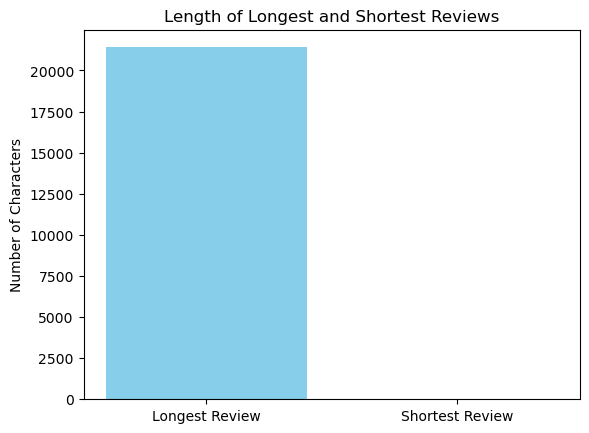

In [7]:
import matplotlib.pyplot as plt

# Find the longest and shortest reviews in the entire dataset
longest_review_index = df['Text'].apply(len).idxmax()
shortest_review_index = df['Text'].apply(len).idxmin()

# Extract the reviews and number of characters
longest_review_text = df.loc[longest_review_index, 'Text']
shortest_review_text = df.loc[shortest_review_index, 'Text']
num_characters_longest = len(longest_review_text)
num_characters_shortest = len(shortest_review_text)

# Create a bar graph
labels = ['Longest Review', 'Shortest Review']
lengths = [num_characters_longest, num_characters_shortest]

plt.bar(labels, lengths, color=['skyblue', 'red'])
plt.title('Length of Longest and Shortest Reviews')
plt.ylabel('Number of Characters')
plt.show()


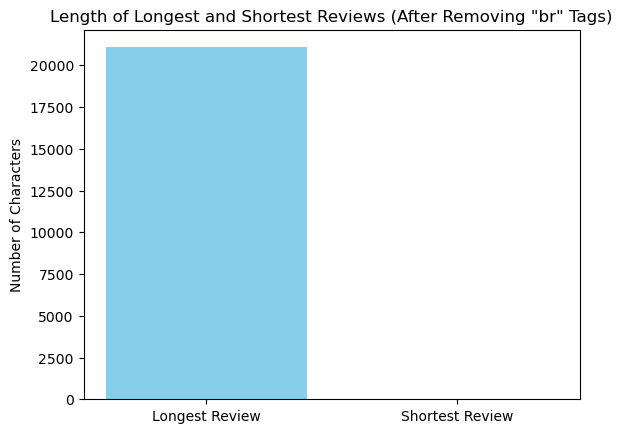

In [8]:
import matplotlib.pyplot as plt

# Find the longest and shortest reviews in the entire dataset
longest_review_index = df['Text'].apply(len).idxmax()
shortest_review_index = df['Text'].apply(len).idxmin()

# Extract the reviews and number of characters, 
longest_review_text = df.loc[longest_review_index, 'Text'].replace('<br />', '')
shortest_review_text = df.loc[shortest_review_index, 'Text'].replace('<br />', '')

# Create a bar graph
labels = ['Longest Review', 'Shortest Review']
lengths = [len(longest_review_text), len(shortest_review_text)]

plt.bar(labels, lengths, color=['skyblue', 'red'])
plt.title('Length of Longest and Shortest Reviews (After Removing "br" Tags)')
plt.ylabel('Number of Characters')
plt.show()


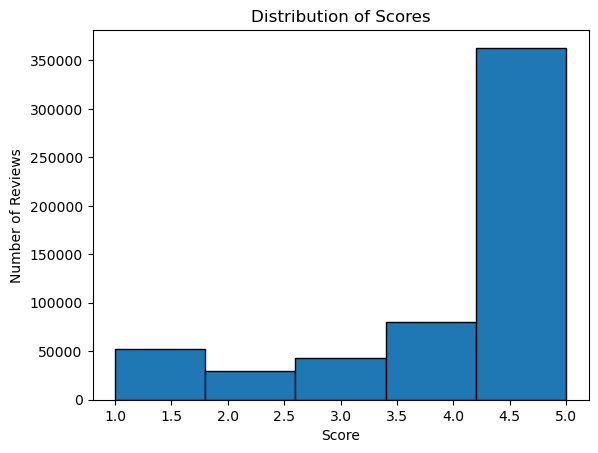

Correlation between review length and score: -0.07733381425483868


In [9]:
import matplotlib.pyplot as plt

# Calculating the length of each review and add it as a new column
df['ReviewLength'] = df['Text'].apply(len)

# Displaying the distribution of scores
plt.hist(df['Score'], bins=5, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Scores')
plt.show()

# Calculating the correlation between review length and score
correlation = df['ReviewLength'].corr(df['Score'])

# Displaying the correlation
print(f'Correlation between review length and score: {correlation}')

In [10]:
# List of slang words
slang_words = ['lol', 'brb', 'ttyl', 'omg', 'rofl', 'dude', 'lit', 'tbh', ]

# Create a new column in the dataframe to store the slang words in each review
df['SlangWords'] = df['Text'].apply(lambda x: [word for word in str(x).split() if word in slang_words])

# Display the reviews that contain slang words
print(df[df['SlangWords'].apply(len) > 0])


            Id   ProductId          UserId                   ProfileName  \
967        968  B00448SNSA  A2VTNMSQLKUPFA           innocent_sweetiepie   
1201      1202  B008L19ZQ0  A2P19WZ6WD2OZK                         Brock   
2060      2061  B001E5E29A  A12DWM9QVT0UUA               RaRaDC "RaRaDC"   
2180      2181  B002SW7ZOW  A30YYMAI6NXWKM                     Thomas O.   
3203      3204  B000084DVR  A1UGDJP1ZJWVPF  T. Moore "thoughtful reader"   
...        ...         ...             ...                           ...   
563780  563781  B007JFMH8M  A2VIXDY3AW8GSY                    roxygarces   
563819  563820  B007JFMH8M  A1HXFAZ5GOHDSE                    DarkAayala   
564214  564215  B001EPPLXG   ARW67EPLT23KG                         Kimmi   
564668  564669  B00017LF2O  A3M4S41KAW6ZXW                          E.B.   
565520  565521  B002GKEK7G  A2X1CCUYCKLIRV        KRIS TYLER "LATIN MAN"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
967         

In [11]:
from collections import Counter

# Flatten the list of slang words in each review
all_slang_words = [word for words in df['SlangWords'] for word in words]

# Count the frequency of each slang word
slang_word_counts = Counter(all_slang_words)

# Display the most common slang words
print(slang_word_counts.most_common())


[('lol', 514), ('lit', 58), ('omg', 54), ('dude', 46), ('tbh', 2)]


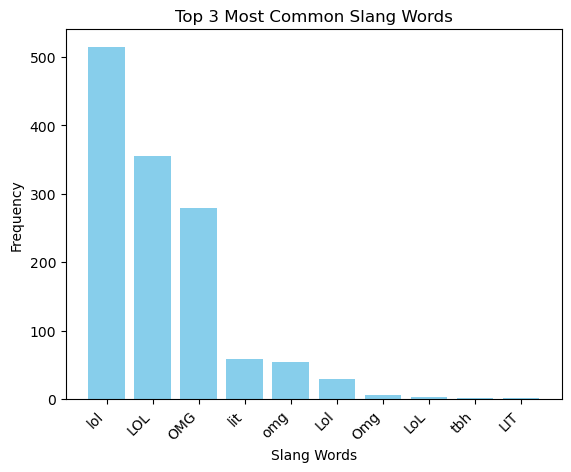

In [12]:
from collections import Counter
import matplotlib.pyplot as plt

# Defining a function to check if a word is a slang word
def is_slang(word):
    common_slang_words = ['lol', 'omg', 'lit', 'tbh']
    return word.lower() in common_slang_words

all_slang_words = [word for text in df['Text'] for word in text.split() if is_slang(word)]

# Count the frequency of each slang word
slang_word_counts = Counter(all_slang_words)

# Display the most common slang words visually using a bar plot
common_slang_words = slang_word_counts.most_common(10)  # Display top 10 slang words
words, counts = zip(*common_slang_words)

plt.bar(words, counts, color='skyblue')
plt.xlabel('Slang Words')
plt.ylabel('Frequency')
plt.title('Top 3 Most Common Slang Words')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [13]:
import pandas as pd

# Display the first few rows of the dataset before cleaning
print("First few rows of the dataset before cleaning:")
print(df.head())

# Text cleaning
text_column_name = 'Text'
df['cleaned_text'] = df[text_column_name].str.replace('<.*?>', '', regex=True)  # Remove HTML tags
df['cleaned_text'] = df['cleaned_text'].str.replace('[^A-Za-z0-9\s]', '', regex=True)  # Remove special characters
df['cleaned_text'] = df['cleaned_text'].str.lower()  # Convert to lowercase

# Display the first few rows of the dataset after cleaning
print("\nFirst few rows of the dataset after cleaning:")
print(df['cleaned_text'].head())

First few rows of the dataset before cleaning:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have

C:\Users\win11\AppData\Local\Temp\ipykernel_31792\2074226540.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='UserId', y='Id', hue='Year', data=top_reviewers, ci=None)


AttributeError: 'numpy.int32' object has no attribute 'startswith'

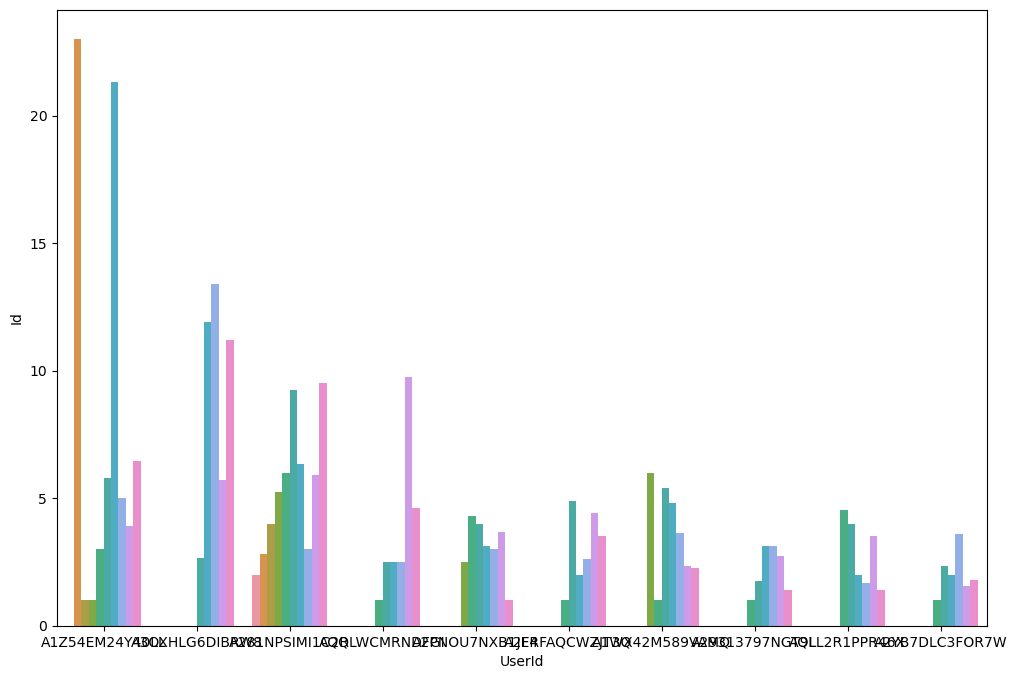

In [15]:
#This code loads a dataset from a CSV file, converts the 'Time' column to datetime, 
#extracts the year and month, and then identifies and visualizes the top 10 reviewers over time. 
#It groups the data by user, year, and month, counts the reviews, filters for the top reviewers,
#and plots a grouped bar chart with different colors representing different years for each user, 
#providing insights into the review patterns of the top reviewers over time.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:Desktop/DM Project/Reviews.csv'
df = pd.read_csv(file_path)

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Extract year and month
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month_name()

# Group by user, year, and month, and count reviews
top_reviewers = df.groupby(['UserId', 'Year', 'Month'])['Id'].count().reset_index()
top_reviewers = top_reviewers.sort_values(by='Id', ascending=False)

# Filter for the top 10 reviewers
top_reviewers = top_reviewers[top_reviewers['UserId'].isin(top_reviewers['UserId'].value_counts().head(10).index)]

# Plotting a grouped bar chart with color per user
plt.figure(figsize=(12, 8))
sns.set_palette("husl")
ax = sns.barplot(x='UserId', y='Id', hue='Year', data=top_reviewers, ci=None)
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.title('Top Reviewers Over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Manually set the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()




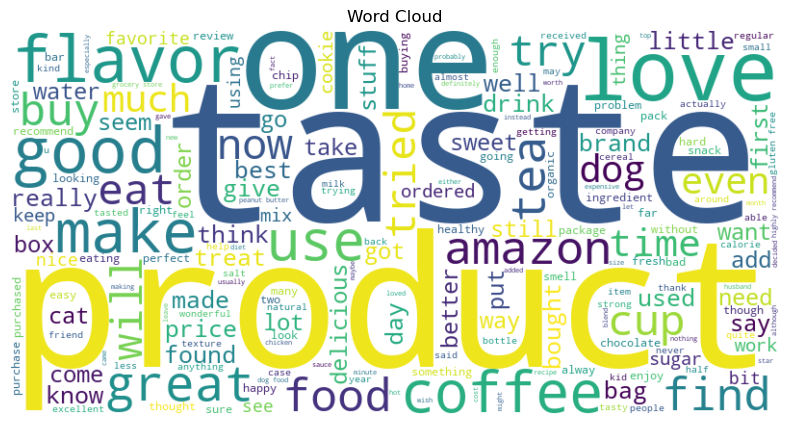

In [8]:
#This code loads a dataset from a CSV file, converts the 'Time' column to datetime, 
#extracts the year and month, and then identifies and visualizes the top 10 reviewers over time. 
#It groups the data by user, year, and month, counts the reviews, filters for the top reviewers,
#and plots a grouped bar chart with different colors representing different years for each user, 
#providing insights into the review patterns of the top reviewers over time.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:Desktop/DM Project/Reviews.csv'
df = pd.read_csv(file_path)


# Preprocess the reviews by removing HTML tags and the string '<br>'
def clean_text(text):
    cleaned_text = re.sub(r'<.*?>|<br>', '', text)
    return cleaned_text.lower()  # Lowercasing added

df['CleanedText'] = df['Text'].apply(clean_text)

# Sample 10% of the reviews
subset_reviews = df['CleanedText'].sample(frac=0.1, random_state=42).tolist()

# Join all cleaned reviews into a single string
all_cleaned_reviews_subset = ' '.join(subset_reviews)

# Generate the word cloud for the subset
wordcloud_subset = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_reviews_subset)

# Display the word cloud for the subset of reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_subset, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')

# Show the plot
plt.show()


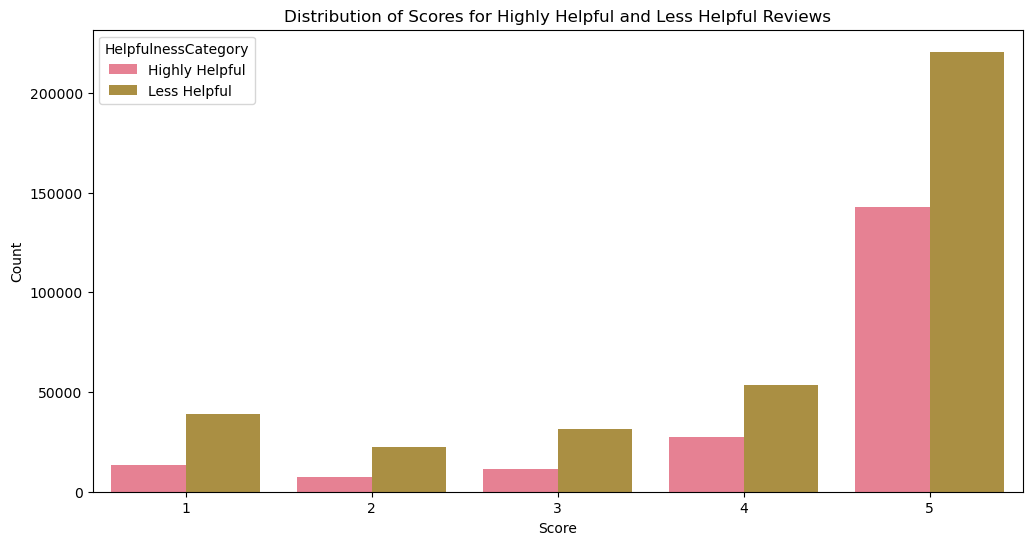

Summary Statistics for Highly Helpful Reviews:
                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  201659.000000         201659.000000           201659.000000   
mean   284288.577986              4.026287                4.182248   
std    162856.841445             12.201990               12.752337   
min         1.000000              1.000000                1.000000   
25%    144191.500000              1.000000                1.000000   
50%    285520.000000              2.000000                2.000000   
75%    424562.500000              4.000000                4.000000   
max    568453.000000            866.000000              923.000000   

               Score          Time  HelpfulnessRatio  
count  201659.000000  2.016590e+05     201659.000000  
mean        4.380831  1.282151e+09          0.988176  
std         1.163628  5.108303e+07          0.041072  
min         1.000000  9.408096e+08          0.800000  
25%         4.000000  1.251936e+09          1.0

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:Desktop/DM Project/Reviews.csv'
df = pd.read_csv(file_path)

# Calculate the helpfulness ratio (Numerator / Denominator)
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace({0: 1})  # Avoid division by zero

# Define a threshold to classify reviews as highly helpful or less helpful
helpfulness_threshold = 0.8
df['HelpfulnessCategory'] = df['HelpfulnessRatio'].apply(lambda x: 'Highly Helpful' if x >= helpfulness_threshold else 'Less Helpful')

# Compare the distribution of scores
plt.figure(figsize=(12, 6))
sns.countplot(x='Score', data=df, hue='HelpfulnessCategory')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores for Highly Helpful and Less Helpful Reviews')
plt.show()

# Add more comparisons as needed based on your dataset features

# Print summary statistics
print("Summary Statistics for Highly Helpful Reviews:")
print(df[df['HelpfulnessCategory'] == 'Highly Helpful'].describe())

print("\nSummary Statistics for Less Helpful Reviews:")
print(df[df['HelpfulnessCategory'] == 'Less Helpful'].describe())


In [5]:
!pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 388.9 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 901.1 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.3 MB/s eta 0:00:00
